In [2]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.ConvNet.ConvNet_new import *
from NN_library.AutoUnet.AutoUnet_new import *
from NN_library.ConvNet.train_ConvNet import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

Using device: cuda
Using device: cuda


Test U-Net

In [3]:
data = dataset_new()
loaders = get_loaders(data, 1)

In [9]:
#name = 'NN_library/ConvNet/ConvNet_new_norm'
name = 'NN_library/ConvNet/Conv_w_AutoUnet_new_norm'
args = {'lr' : 0.001, 'epochs' : 20, 'dev' : dev, 'name' : name}
net = ConvNet(16)
net = load_network(net, args['name'], args)

In [5]:
L_stiff, L_shr = test(net, loaders, args)
L_shr = np.array(L_shr)
L_stiff = np.array(L_stiff)

In [6]:
shr_mean = L_shr.sum(axis=1).mean()
shr_std = L_shr.sum(axis=1).std()
stiff_mean = L_stiff.sum(axis=1).mean()
stiff_std = L_stiff.sum(axis=1).std()
print(shr_mean, shr_std)
print(stiff_mean, stiff_std)

0.06314397 0.029961945
0.03840747 0.019553997


In [7]:
shr_mean = np.mean(L_shr, axis=0)
shr_std = np.std(L_shr, axis=0)
stiff_mean = np.mean(L_stiff, axis=0)
stiff_std = np.std(L_stiff, axis=0)

In [8]:
print(shr_mean, '\n', shr_std)
print(stiff_mean, '\n', stiff_std)

[0.00640027 0.00687818 0.00805231 0.00807826 0.0071883  0.00651303
 0.0055894  0.00512197 0.00470899 0.00461325] 
 [0.00497312 0.0046118  0.0047247  0.00465705 0.00453458 0.00452982
 0.00433712 0.00420353 0.003951   0.00380737]
[0.00015611 0.00147659 0.00237332 0.00247178 0.00293636 0.00299485
 0.00366958 0.00489396 0.00692502 0.0105099 ] 
 [0.00030388 0.00138217 0.00288391 0.00325775 0.00581368 0.00308523
 0.00346989 0.00464279 0.00684705 0.01000763]


Text(0, 0.5, 'Stiffness loss')

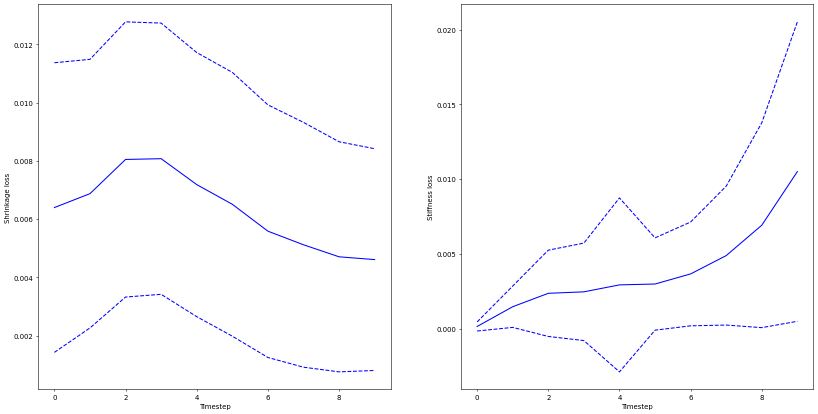

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), dpi=50)

axs.flat[0].plot(shr_mean, 'b')
axs.flat[0].plot(shr_mean+shr_std, 'b--')
axs.flat[0].plot(shr_mean-shr_std, 'b--')
axs.flat[0].set_xlabel('Timestep')
axs.flat[0].set_ylabel('Shrinkage loss')

axs.flat[1].plot(stiff_mean, 'b')
axs.flat[1].plot(stiff_mean+stiff_std, 'b--')
axs.flat[1].plot(stiff_mean-stiff_std, 'b--')
axs.flat[1].set_xlabel('Timestep')
axs.flat[1].set_ylabel('Stiffness loss')

In [10]:
unet = AutoUNet()
#unet = load_network(unet, 'NN_library/AutoUnet/AutoUnet_new_pt_norm', args)
unet = load_network(unet, 'NN_library/AutoUnet/AutoUnet_w_Conv_new_norm', args)

In [11]:
L_stiff, L_shr = test_w_Auto(unet, net, loaders, args)
L_shr = np.array(L_shr)
L_stiff = np.array(L_stiff)
shr_mean = L_shr.sum(axis=1).mean()
shr_std = L_shr.sum(axis=1).std()
stiff_mean = L_stiff.sum(axis=1).mean()
stiff_std = L_stiff.sum(axis=1).std()
print(shr_mean, shr_std)
print(stiff_mean, stiff_std)

0.040616065 0.020153254
0.04314398 0.025647294


In [12]:
shr_mean = np.mean(L_shr, axis=0)
shr_std = np.std(L_shr, axis=0)
stiff_mean = np.mean(L_stiff, axis=0)
stiff_std = np.std(L_stiff, axis=0)
print(shr_mean, '\n', shr_std)
print(stiff_mean, '\n', stiff_std)

[0.0035878  0.00348713 0.00343895 0.00342662 0.00366454 0.00416664
 0.00446067 0.00493845 0.00489508 0.00455018] 
 [0.00332409 0.00296504 0.00282229 0.00273687 0.00293749 0.00340589
 0.00388982 0.00444695 0.00432269 0.00388504]
[0.00015612 0.00144782 0.00247726 0.00255689 0.0032906  0.00351137
 0.00458407 0.0060186  0.00807277 0.01102848] 
 [0.00030388 0.00137007 0.00293723 0.00334912 0.00607411 0.00377435
 0.00457771 0.00629359 0.00877629 0.01095341]


Text(0, 0.5, 'Stiffness loss')

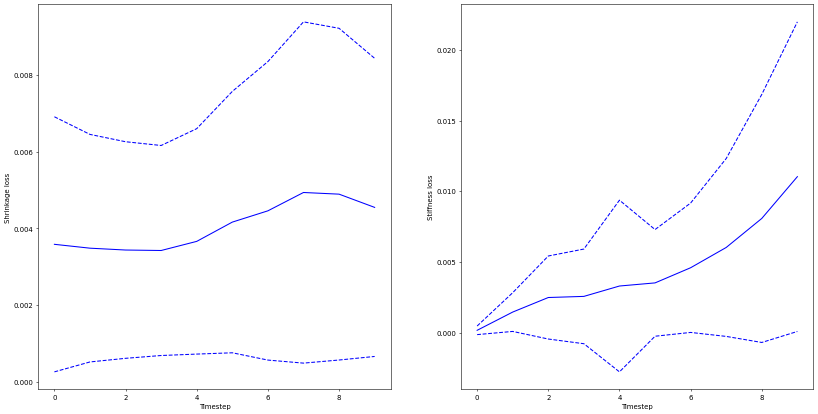

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), dpi=50)

axs.flat[0].plot(shr_mean, 'b')
axs.flat[0].plot(shr_mean+shr_std, 'b--')
axs.flat[0].plot(shr_mean-shr_std, 'b--')
axs.flat[0].set_xlabel('Timestep')
axs.flat[0].set_ylabel('Shrinkage loss')

axs.flat[1].plot(stiff_mean, 'b')
axs.flat[1].plot(stiff_mean+stiff_std, 'b--')
axs.flat[1].plot(stiff_mean-stiff_std, 'b--')
axs.flat[1].set_xlabel('Timestep')
axs.flat[1].set_ylabel('Stiffness loss')